In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(pd.read_csv('../data/indian_food.csv'))
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


Text(0, 0.5, '')

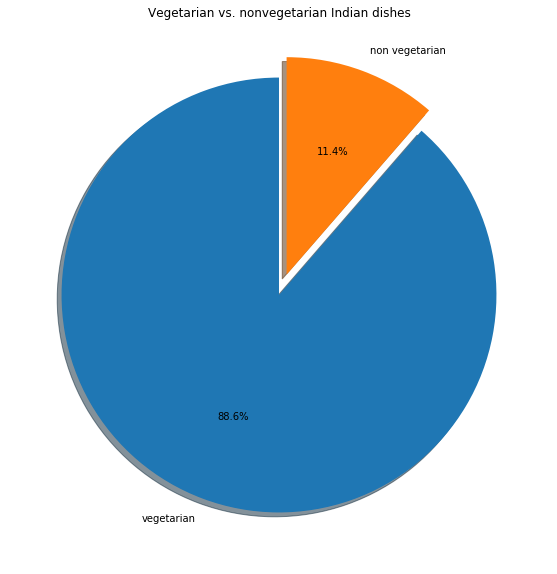

In [5]:
explode = (0, 0.1)
df.groupby('diet').size().sort_values(ascending=False)\
    .plot(kind='pie',\
          title='Vegetarian vs. nonvegetarian Indian dishes',\
          explode=explode,\
          figsize=(10,10),\
          autopct='%1.1f%%',\
          shadow=True,\
          startangle=90)\
    .set_ylabel('')

In [6]:
df.groupby('course')['cook_time'].mean().sort_values(ascending=False)

course
dessert        43.929412
starter        37.500000
main course    29.930233
snack          29.102564
Name: cook_time, dtype: float64

In [7]:
df.loc[df.cook_time==df.cook_time.min()].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


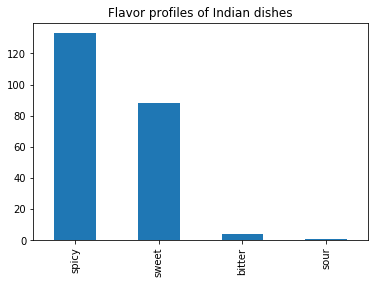

In [8]:
df.loc[df['flavor_profile'] != '-1']['flavor_profile'].value_counts()\
    .plot(kind='bar', title='Flavor profiles of Indian dishes')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0, 0.5, 'Cook time (mins)')

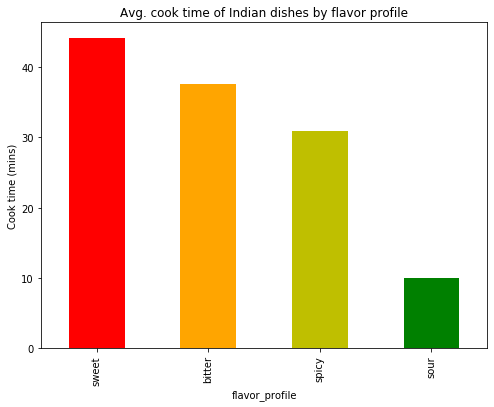

In [9]:
colors = ['r','orange','y','g','b']
df.loc[(df.cook_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('flavor_profile')['cook_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. cook time of Indian dishes by flavor profile', figsize=(8,6), color=colors)\
    .set_ylabel("Cook time (mins)")

Text(0, 0.5, 'Prep time (mins)')

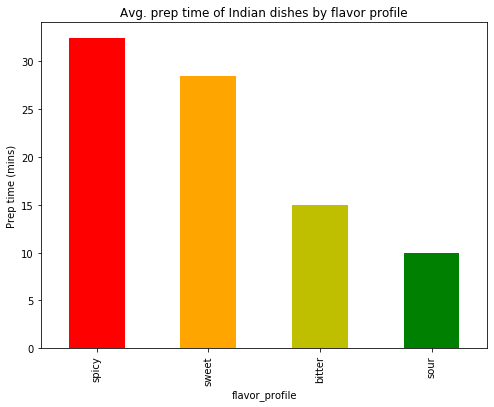

In [10]:
colors = ['r','orange','y','g','b']
df.loc[(df.prep_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('flavor_profile')['prep_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. prep time of Indian dishes by flavor profile', figsize=(8,6), color=colors)\
    .set_ylabel("Prep time (mins)")

Text(0, 0.5, 'Time (mins)')

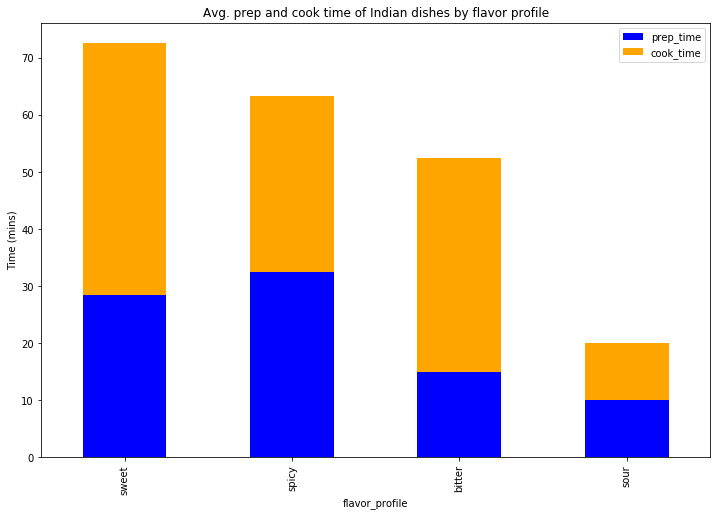

In [11]:
df['total_time'] = df['prep_time'] + df['cook_time']
colors = ['b','orange','r','g','y']
df.loc[(df.prep_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('flavor_profile')[['prep_time', 'cook_time', 'total_time']].mean()\
    .sort_values('total_time', ascending=False)\
    .drop(columns='total_time')\
    .plot(kind='bar',\
          title='Avg. prep and cook time of Indian dishes by flavor profile',\
          figsize=(12,8),\
          color=colors,\
          stacked=True)\
    .set_ylabel("Time (mins)")

Text(0, 0.5, 'Time (mins)')

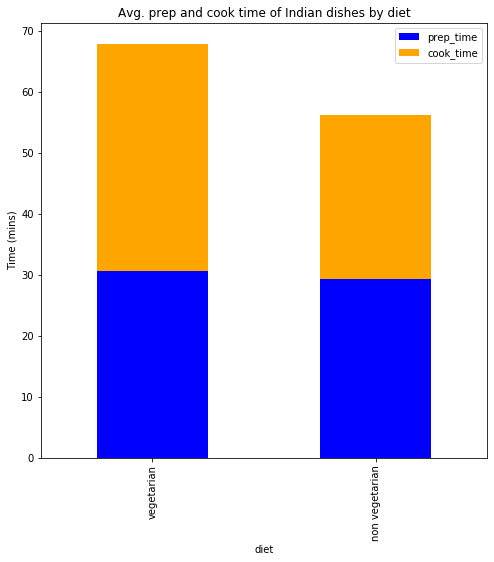

In [12]:
# df['total_time'] = df['prep_time'] + df['cook_time']
colors = ['b','orange','r','g','y']
df.loc[(df.prep_time != '-1') & (df.flavor_profile != '-1')]\
    .groupby('diet')[['prep_time', 'cook_time', 'total_time']].mean()\
    .sort_values('total_time', ascending=False)\
    .drop(columns='total_time')\
    .plot(kind='bar',\
          title='Avg. prep and cook time of Indian dishes by diet',\
          figsize=(8,8),\
          color=colors,\
          stacked=True)\
    .set_ylabel("Time (mins)")

Text(0, 0.5, 'Cook time (mins)')

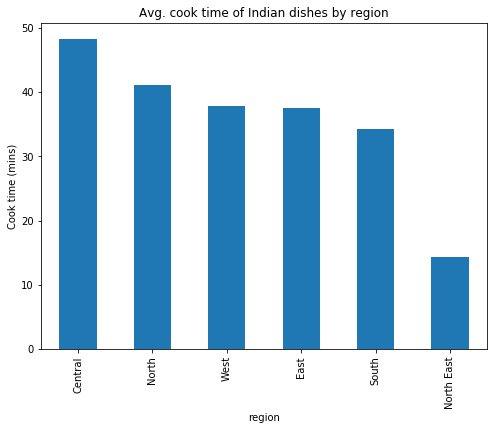

In [13]:
# colors = ['r','orange','y','g','b']
df.loc[(df.cook_time != '-1') & (df.region != '-1')]\
    .groupby('region')['cook_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. cook time of Indian dishes by region', figsize=(8,6))\
    .set_ylabel("Cook time (mins)")

Text(0, 0.5, 'Cook time (mins)')

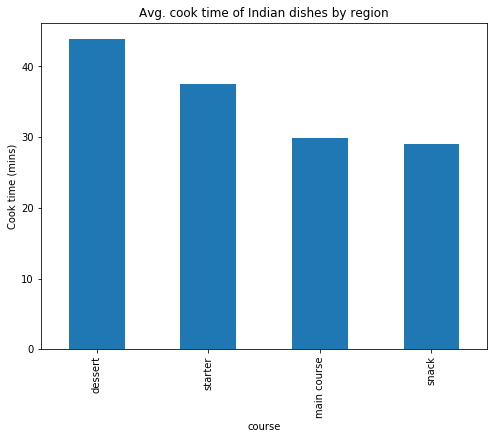

In [14]:
df.loc[(df.cook_time != '-1') & (df.course != '-1')]\
    .groupby('course')['cook_time']\
    .mean().sort_values(ascending=False)\
    .plot(kind='bar', title='Avg. cook time of Indian dishes by region', figsize=(8,6))\
    .set_ylabel("Cook time (mins)")

In [44]:
ingredient_recurrence = {}

for x in df.ingredients.to_list():
    for i in x.split(', '):
        if i in ingredient_recurrence:
            ingredient_recurrence[i] += 1
        else:
            ingredient_recurrence[i] = 1

ingredient_recurrence = sorted(ingredient_recurrence.items(), key=lambda x: x[1], reverse=True)

ingredient_recurrence

[('sugar', 44),
 ('ginger', 29),
 ('garam masala', 27),
 ('ghee', 25),
 ('curry leaves', 25),
 ('jaggery', 18),
 ('urad dal', 17),
 ('Rice flour', 16),
 ('milk', 15),
 ('tomato', 15),
 ('garam masala powder', 12),
 ('mustard oil', 12),
 ('Chana dal', 11),
 ('sesame seeds', 11),
 ('saffron', 10),
 ('turmeric', 10),
 ('coconut', 10),
 ('Whole wheat flour', 10),
 ('clarified butter', 9),
 ('cardamom', 9),
 ('gram flour', 9),
 ('mustard seeds', 9),
 ('lemon juice', 8),
 ('garlic', 8),
 ('potato', 8),
 ('Urad dal', 8),
 ('baking soda', 7),
 ('Rice', 7),
 ('salt', 7),
 ('Wheat flour', 7),
 ('tomatoes', 7),
 ('butter', 7),
 ('all purpose flour', 7),
 ('Moong dal', 7),
 ('bengal gram flour', 7),
 ('grated coconut', 7),
 ('raisins', 6),
 ('curd', 6),
 ('Milk', 6),
 ('Chhena', 6),
 ('cream', 6),
 ('semolina', 6),
 ('chillies', 6),
 ('kasuri methi', 6),
 ('cashew nuts', 6),
 ('green chili', 6),
 ('lemon', 6),
 ('gur', 6),
 ('oil', 5),
 ('nuts', 5),
 ('fennel seeds', 5),
 ('wheat flour', 5),
 ('ch

In [43]:
ingredient_df = pd.DataFrame({
    'ingredient': (x[0] for x in ingredient_recurrence),
    'number of occurrences': (x[1] for x in ingredient_recurrence)
    })
ingredient_df

,ingredient,number of occurrences
0,sugar,44
1,ginger,29
2,garam masala,27
3,ghee,25
4,curry leaves,25
...,...,...
420,egg yolks,1
421,dry dates,1
422,dried rose petals,1
423,arrowroot powder,1


Text(0, 0.5, 'Number of occurrences in database')

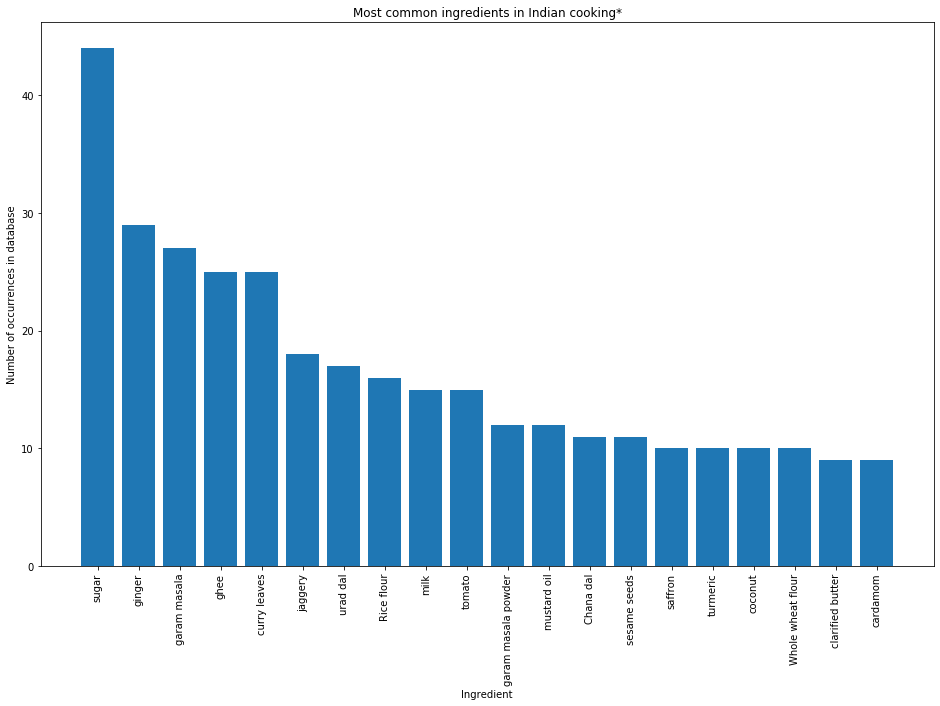

In [72]:
plt.figure(figsize=(16, 10))
plt.bar(ingredient_df['ingredient'].head(20), ingredient_df['number of occurrences'].head(20))
plt.xticks(rotation=90)
plt.title('Most common ingredients in Indian cooking*')
plt.xlabel('Ingredient')
plt.ylabel('Number of occurrences in database')

Text(0, 0.5, 'Number of occurrences in database')

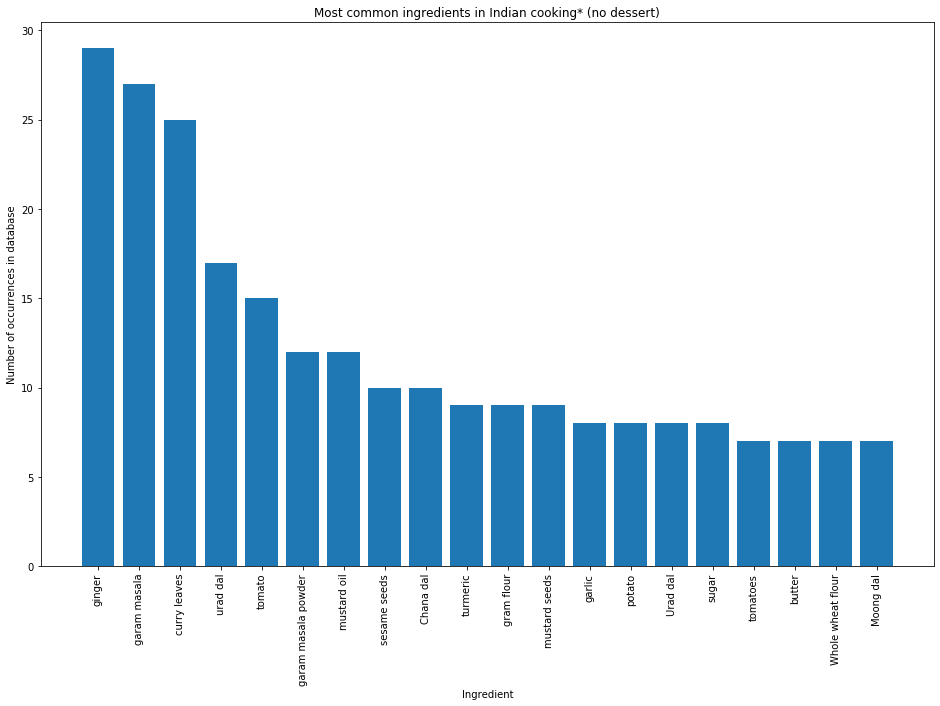

In [75]:
ingredient_recurrence = {}

for x in df.loc[df.course != 'dessert']['ingredients'].to_list():
    for i in x.split(', '):
        if i in ingredient_recurrence:
            ingredient_recurrence[i] += 1
        else:
            ingredient_recurrence[i] = 1

ingredient_recurrence = sorted(ingredient_recurrence.items(), key=lambda x: x[1], reverse=True)

ingredient_df = pd.DataFrame({
    'ingredient': (x[0] for x in ingredient_recurrence),
    'number of occurrences': (x[1] for x in ingredient_recurrence)
    })

plt.figure(figsize=(16, 10))
plt.bar(ingredient_df['ingredient'].head(20), ingredient_df['number of occurrences'].head(20))
plt.xticks(rotation=90)
plt.title('Most common ingredients in Indian cooking* (no dessert)')
plt.xlabel('Ingredient')
plt.ylabel('Number of occurrences in database')